In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn")
!cd ../src && make clean
!cd ../src && make
print('\x1b[1;30m'+ 'Done!!' +'\x1b[0m')
print('\x1b[1;30m'+ 'Required: pandas version >1.0.0' +'\x1b[0m')

rm -f *.o ejec
g++ *.cpp -o ejec 
Done!!
Required: pandas version >1.0.0


## Levantamos los datos y los procesamos

In [2]:
df = pd.read_csv("../mejores_sol_sin_dobles.csv")
df.sort_values(by="cities",axis=0,ascending=True,inplace=True,ignore_index=True)
#df.describe()
df.head(10)

,name,cities,type,bounds
0,burma14,14,GEO,3323
1,ulysses16,16,GEO,6859
2,gr17,17,MATRIX,2085
3,gr21,21,MATRIX,2707
4,ulysses22,22,GEO,7013
5,gr24,24,MATRIX,1272
6,fri26,26,MATRIX,937
7,bayg29,29,GEO,1610
8,bays29,29,GEO,2020
9,dantzig42,42,MATRIX,699


In [3]:
#conjuntos de instancias para exp de tiempos de ejecución donde sólo varía el tamaño de la instancia 
instancias_list = df["name"].to_numpy()
instancias_size_list = df["cities"].to_numpy()
instancias_bounds_list = df["bounds"].to_numpy()

## Declaramos funciones importantes para la experimentación

In [49]:
import ast
#Llama al binario "ejec" con los parámetros pasados, toma filename en vez del path!!!
#Retorna una lista donde [0]=cant_vectores [1]=costo_solución [2]=tiempo insumido y [3]=array_camino
def llamarbin(mode, instance_name, tam=0, iter=0, percent_vecinos=0):
    file=to_path(instance_name)
    #Llamo el binario desde la consola y guardo la salida en una variable
    output = !../src/ejec {mode} {file} {tam} {iter} {percent_vecinos}
    #Voy a devolver una lista donde [0]=cant_vectores [1]=costo_solución y [2]=array_camino
    l = ast.literal_eval(output[1])
    l = np.array(l, dtype=np.intc)
    man_out = output[0].split(' ', 2)
    man_out.append(l)
    return man_out

#Transforma el rawname de una instancia a path de archivo
def to_path(instancia):
    res = "../data/" + instancia + ".tsp"
    return res

def removeOutliers(x :np.ndarray, outlierConstant=1.5):
    a = x
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    indexes = np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))
    result = a[indexes]
    
    return (result,indexes)

## Exp tiempo de ejecución para distintos tipos de instacias

In [135]:
!cd ../data/dataGenerada && rm -rf ./*
!cp -r ./dataGeneradaAmi/dataGenerada/ ../data/dataGenerada

In [136]:
# Gráfico que muestre tiempo de ejecución en función de tamaño de entrada tomando conjuntos de mismo tamaño de instancias random
modo = "AMC" #Cambiar por el modo que se quiera usar
salto = 50; #entre los tamaños que se toman
cantTamanios = 5;
tamanios = list(range(salto,cantTamanios*salto+1,salto))
#tamanios = list(range(salto,cantTamanios*salto,salto)) ESTA LINEA ES PARA SACAR EL N=250 (comentando la linea de arriba)
indices = list(range(0,10))
cantArchivos = 10
tiposInstancias = ["random","euclideanas","mejor caso NN"]

tiemposPorTamanio = []

for i in tamanios:
    tiempos = []
    for j in tiposInstancias:
        sumaTiempo = 0
        for k in range(cantArchivos):
            if(j == "random"):
                if(k<10): 
                    sumaTiempo += float(llamarbin(modo,"dataGenerada/generada_0"+str(k)+"_"+str(i))[2])
                else:
                    sumaTiempo += float(llamarbin(modo,"dataGenerada/generada_"+str(k)+"_"+str(i))[2])
            elif(j == "euclideanas"):
                if(k<10): 
                    sumaTiempo += float(llamarbin(modo,"dataGenerada/euc/generada_EUC"+str(i)+"_0"+str(k))[2])
                else:
                    sumaTiempo += float(llamarbin(modo,"dataGenerada/euc/generada_EUC"+str(i)+"_"+str(k))[2])
            else: 
                if(k<10): 
                    sumaTiempo += float(llamarbin(modo,"dataGenerada/NNMejorCaso0"+str(k)+"_"+str(i))[2])
                else:
                    sumaTiempo += float(llamarbin(modo,"dataGenerada/NNMejorCaso"+str(k)+"_"+str(i))[2])
                   
                
        tiempo = sumaTiempo/cantArchivos
        tiempos.append(tiempo)
    tiemposPorTamanio.append(tiempos)

print(tiemposPorTamanio)

fig = plt.figure(figsize=(8,6),dpi=80)
for vector in tiemposPorTamanio:
    plt.scatter(tiposInstancias,vector)
    
plt.legend(tamanios, loc='upper right')
plt.xlabel("Instancia")
plt.ylabel("Tiempo(ms)")
plt.xticks(tiposInstancias)
plt.title("Tiempo de ejecución en función del tamaño de instancia");
plt.show()
fig.savefig("./graficos/tiempoEjec"+modo+".png")

IndexError: list index out of range

In [ ]:
tiposInstancias = ["Random","Euclidianas","Mejor caso NN"]
fig = plt.figure(figsize=(8,6),dpi=80)
for vector in tiemposPorTamanio:
    plt.scatter(tiposInstancias,vector)
    
plt.legend(tamanios, loc='upper left')
plt.xlabel("Tipos de instancia")
plt.ylabel("Tiempo(ms)")
plt.xticks(tiposInstancias)
plt.title("Tiempo de ejecución en función del tamaño de instancia "+ modo);
plt.show()
fig.savefig("./graficos/tiempoEjec"+modo+".png")

In [ ]:
tiposInstancias = ["Random","Euclidianas","Mejor caso NN"]
fig = plt.figure(figsize=(8,6),dpi=80)
for vector in tiemposPorTamanio:
    plt.scatter(tiposInstancias[:-1],vector[:-1])
    
plt.legend(tamanios)
plt.xlabel("Tipos de instancia")
plt.ylabel("Tiempo(ms)")
plt.xticks(tiposInstancias[:-1])
plt.title("Tiempo de ejecución en función del tamaño de instancia "+ modo);
plt.show()
fig.savefig("./graficos/tiempoEjec"+modo+".png")

# AGM
## a) Calidad soluciones en grafos euclidianos vs no euclidianos

In [41]:
import ast
#Llama al binario "ejec" con los parámetros pasados, toma filename en vez del path!!!
#Retorna una lista donde [0]=cant_vectores [1]=costo_solución [2]=tiempo insumido y [3]=array_camino
def llamarbin(mode, instance_name, tam=0, iter=0, percent_vecinos=0):
    file=to_path(instance_name)
    #print("{} {} {} {} {}".format(mode, file, tam, iter, percent_vecinos))
    #Llamo el binario desde la consola y guardo la salida en una variable
    output = !../src/ejec {mode} {file} {tam} {iter} {percent_vecinos}
    #Voy a devolver una lista donde [0]=cant_vectores [1]=costo_solución y [2]=array_camino
    l = ast.literal_eval(output[1])
    l = np.array(l, dtype=np.intc)
    man_out = output[0].split(' ', 2)
    man_out.append(l)
    return man_out

#Transforma el rawname de una instancia a path de archivo
def to_path(instancia):
    res = "../data/" + instancia + ".tsp"
    return res

def removeOutliers(x :np.ndarray, outlierConstant=1.5):
    a = x
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    indexes = np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))
    result = a[indexes]
    
    return [result,indexes]

#Corre el binario para la lista de conjuntos de instancias instance_list, cada una con los modos de la lista de modos,
#para las primeras :size instancias de cada conjunto de instancias, y devuelve una lista de porcentajes de la solucion
#óptima que representa la diferencia en cada solucion (no devuelve directamente el costo de la 
#solucion obtenida por cada corrida) 
def correrbinvarios(resultados, modos, instance_list, bounds_list, size):
    for j in range(len(modos)):
        lista = instance_list[j]
        bounds = bounds_list[j]
        mode = modos[j]

        costos_modo = np.empty(size)
        for i in range(size):
            res = llamarbin(mode,lista[i])
            #print(res)
            costos_modo[i]= res[1]
        diff_costos= (costos_modo - bounds[:size])*100/(bounds[:size])
        #print(removeOutliers(diff_costos)[1])
        resultados.append(diff_costos)
    return resultados

def correrbinconjunto(mode, lista, size, args):
    #print("{} {} {} {}".format(mode,size,args,lista))
    bounds = np.empty(size)
    costos_modo = np.empty(size)
    for i in range(size):
        res = llamarbin(mode,lista[i],args[0],args[1],args[2])
        costos_modo[i]= res[1]
    #diff_costos= (bounds-costos_modo)*100/(bounds)
    return costos_modo

In [42]:
#Generamos las instancias para este test
!cd ../data/dataGenerada && rm -rf ./*
!cd ../data/dataGenerada && mkdir euc && mkdir no_euc
!../src/ejec Random 50 100 1 30
agm_no_euc = !cd ../data/dataGenerada && ls *.tsp
!cd ../data/dataGenerada && mv ./*.tsp ./no_euc
agm_no_euc = ["dataGenerada/no_euc/" + s[:-4] for s in agm_no_euc]
print("Generadas las instancias no euclideas para AGM")

Generadas las instancias no euclideas para AGM


In [43]:
#RandomEuclideo randomEuclideo(stoi(cantidadArchivos), stoi(cantidadVertices), stoi(nStart), stoi(nEnd));
#Generamos las instancias para este test
!../src/ejec RandomEuclideo 50 100 1 30
#agm_euc = !cd ../download_data/temp && ls *.tsp
#!../2_parsear_instancias_euclidianas_propias.sh
agm_euc = !cd ../data/dataGenerada/euc && ls *.tsp
agm_euc = ["dataGenerada/euc/" + s[:-4] for s in agm_euc]
print("Generadas las instancias euclideas para AGM")

mkdir: cannot create directory ‘data’: File exists
Generadas las instancias euclideas para AGM


Calculados los mínimos valores conocidos
[array([11.9858156 , 16.23076923, 17.76119403, 24.2687747 ,  7.59856631]), array([290.23255814, 304.32989691, 297.14285714, 279.78021978])]


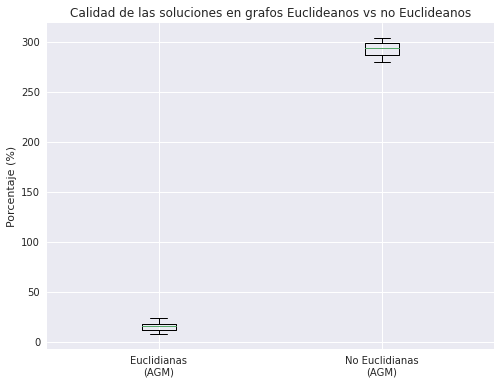

In [53]:
#modos = ["AGM","AMC","NN","TSU","TSA"]
modos = ["NN","NN","AGM","AGM"]
costs = []
#fig=plt.figure(figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(figsize=(8, 6))

#euc_list_2 = np.concatenate((euc_list[:10],euc_list[40:]))
#euc_bounds_list_2 = np.concatenate((euc_bounds_list[:10], euc_bounds_list[40:]))
#euc_size_list_2 = np.concatenate((euc_size_list[:10], euc_size_list[40:]))

instance_list = [agm_euc, agm_no_euc]
#bounds_list = [euc_bounds_list_2, no_euc_bounds_list]
cant_instancias_a_usar = 5

bounds_list = []
for i in range(5):
    bounds = []
    bounds.append(correrbinconjunto(modos[0], instance_list[0], cant_instancias_a_usar, [0,0,0]))
    bounds.append(correrbinconjunto(modos[0], instance_list[1], cant_instancias_a_usar, [0,0,0]))
    if(i==0):
        bounds_list.append(bounds[0])
        bounds_list.append(bounds[1])
    else:
        #print(bounds)
        #print(bounds_list)
        bounds_list[0] = np.minimum(bounds_list[0],bounds[0])
        bounds_list[1] = np.minimum(bounds_list[1],bounds[1])
print("Calculados los mínimos valores conocidos")

promedios = [[],[]]
error = []
for i in range(5):
    corridasNN = []
    correrbinvarios(corridasNN, modos[2:], instance_list, bounds_list, cant_instancias_a_usar)
    promedios[0].append(corridasNN[0])
    promedios[1].append(corridasNN[1])

costs.append(np.mean(promedios[0], axis=0))
costs.append(np.mean(promedios[1], axis=0))

for i in range(len(costs)):
    costs[i] = removeOutliers(costs[i])[0]
    
print(costs)
ax.boxplot(costs)
#ponerle legend y xticks y todo eso
locs,_ = plt.xticks()
plt.xticks(locs,["Euclidianas\n(AGM)", "No Euclidianas\n(AGM)","Euclidianas\n(NN)", "No Euclidianas\n(NN)"])
plt.ylabel("Porcentaje (%)")
plt.title("Calidad de las soluciones en grafos Euclideanos vs no Euclideanos");
fig.savefig("./graficos/calidad_euclideano.png")

### Tests de casos patológicos de AMC y NN están en testsPropios1

# Generación de instancias para tests TS

In [50]:
def llamarbinTS(mode, instance_name, tam, iter, percent_vecinos):
    file=to_path(instance_name)
    #Llamo el binario desde la consola y guardo la salida en una variable
    output = !../src/ejec {mode} {file} {tam} {iter} {percent_vecinos}
    #Voy a devolver una lista donde [0]=costo sol orig [1]=cant_vectores [2]=costo_solución y [3]=array_camino
    l = ast.literal_eval(output[2])
    l = np.array(l, dtype=np.intc)
    man_out = [output[0].split(':', 1)[1]]
    man_out += output[1].split(' ', 2)
    man_out.append(l)
    return man_out

def correrbinvariosTS(resultados, modos, instance_list, size, args):
    for j in range(len(modos)):
        lista = instance_list[j]
        mode = modos[j]
        bounds = np.empty(size)
        costos_modo = np.empty(size)
        for i in range(size):
            res = llamarbinTS(mode,lista[i],args[0],args[1],args[2])
            costos_modo[i]= res[2]
            bounds[i]= res[0]
        diff_costos= (costos_modo - bounds)*100/(bounds)
        resultados.append(diff_costos)
    return resultados

In [51]:
#Generamos las instancias para este test
!cd ../data/dataGenerada && rm -rf ./*
!../src/ejec Random 50 100 1 30
tsu_iteraciones = !ls ../data/dataGenerada
tsu_iteraciones = ["dataGenerada/" + s[:-4] for s in tsu_iteraciones]
print("Generadas las instancias para TSU_iteraciones")
print(tsu_iteraciones)

mkdir: cannot create directory ‘../data/dataGenerada’: File exists
Generadas las instancias para TSU_iteraciones
['dataGenerada/generada_00_100', 'dataGenerada/generada_01_100', 'dataGenerada/generada_02_100', 'dataGenerada/generada_03_100', 'dataGenerada/generada_04_100', 'dataGenerada/generada_05_100', 'dataGenerada/generada_06_100', 'dataGenerada/generada_07_100', 'dataGenerada/generada_08_100', 'dataGenerada/generada_09_100', 'dataGenerada/generada_10_100', 'dataGenerada/generada_11_100', 'dataGenerada/generada_12_100', 'dataGenerada/generada_13_100', 'dataGenerada/generada_14_100', 'dataGenerada/generada_15_100', 'dataGenerada/generada_16_100', 'dataGenerada/generada_17_100', 'dataGenerada/generada_18_100', 'dataGenerada/generada_19_100', 'dataGenerada/generada_20_100', 'dataGenerada/generada_21_100', 'dataGenerada/generada_22_100', 'dataGenerada/generada_23_100', 'dataGenerada/generada_24_100', 'dataGenerada/generada_25_100', 'dataGenerada/generada_26_100', 'dataGenerada/generada

# Exp vecindad lista tabú
### TSA


In [22]:
tipoTabu = "TSA" # "TSU" 
porcentajesVecindad = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tamanioGrafos = 100
calidadPorVecindad = []
cantidadGrafos = 50
cantCorridas = 5 #cantidad de corridas para una misma instancia para una misma proporción de vecindad 
tamListaTabu = 40
cantIter = 120

for porcentaje in porcentajesVecindad:
    print(porcentaje)
    calidades = []
    for i in tsu_iteraciones:
        solucionInicial = float(llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[0])
        sumaCalidad = 0
        for j in range(cantCorridas):
            solucionFinal = float(llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[2])
            sumaCalidad += (solucionInicial - solucionFinal)*100/solucionInicial
        calidad = sumaCalidad/cantCorridas
        calidades.append(calidad)
    calidadPorVecindad.append(calidades)

prom = np.mean(calidadPorVecindad, axis=1)
err = np.std(calidadPorVecindad, axis=1)


# llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[0] = costo inicial
# llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[2] = costo final
# llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[3] = tiempo ejecucion


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1


In [23]:
print(porcentajesVecindad)
print(prom)
print(err)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
[21.05397188 19.71728319 20.07905515 21.06091956 21.24952179 21.17846176
 21.15571859 21.99392905 21.83672178 21.47802967]
[7.61289446 6.42821374 6.19432073 6.4271176  5.70931274 6.45195448
 5.03232912 5.36878286 5.15606527 5.05604016]


In [24]:
#print(calidadPorTamanio)
err_2 = [err[i]/np.sqrt(np.shape(calidadPorVecindad[i]))[0] for i in range(len(err))]

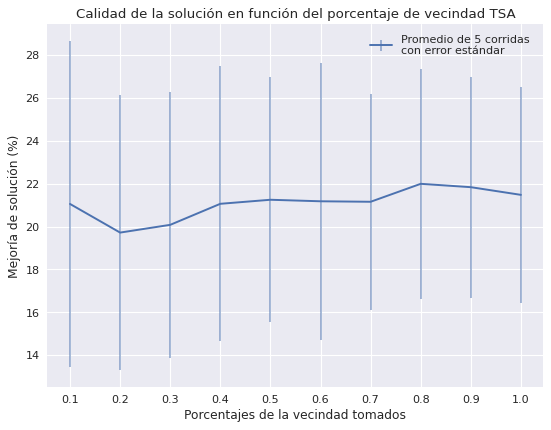

In [25]:
fig,(ax1)=plt.subplots(1,1,figsize=(8, 6), dpi=80)
tam_g = porcentajesVecindad
pro_g = prom
err_g = err
plt.xticks(tam_g)
plt.ylabel("Mejoría de solución (%)")
plt.xlabel("Porcentajes de la vecindad tomados")
plt.title("Calidad de la solución en función del porcentaje de vecindad "+tipoTabu);
_,caps,bars = ax1.errorbar(tam_g,pro_g,yerr=err_g)
[bar.set_alpha(0.5) for bar in bars]

# use them in the legend
ax1.legend(["Promedio de {} corridas \ncon error estándar".format(cantCorridas)])

fig.savefig("./graficos/porcentajesVecindadListaTabu"+str(tipoTabu)+".png")

### TSU

In [26]:
tipoTabu = "TSU" # "TSU" 
porcentajesVecindad = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tamanioGrafos = 100
calidadPorVecindad = []
cantidadGrafos = 50
cantCorridas = 5 #cantidad de corridas para una misma instancia para una misma proporción de vecindad 
tamListaTabu = 40
cantIter = 120

for porcentaje in porcentajesVecindad:
    print(porcentaje)
    calidades = []
    for i in tsu_iteraciones:
        solucionInicial = float(llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[0])
        sumaCalidad = 0
        for j in range(cantCorridas):
            solucionFinal = float(llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[2])
            sumaCalidad += (solucionInicial - solucionFinal)*100/solucionInicial
        calidad = sumaCalidad/cantCorridas
        calidades.append(calidad)
    calidadPorVecindad.append(calidades)

prom = np.mean(calidadPorVecindad, axis=1)
err = np.std(calidadPorVecindad, axis=1)


# llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[0] = costo inicial
# llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[2] = costo final
# llamarbinTS(tipoTabu,i,tamListaTabu,cantIter,porcentaje)[3] = tiempo ejecucion


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1


In [27]:
print(porcentajesVecindad)
print(prom)
print(err)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
[20.07164166 21.18907661 20.9786097  20.09384566 21.90830486 22.05517503
 20.84418943 21.75440323 22.9633613  22.11686197]
[7.24033434 5.93728399 5.99311687 6.85319629 6.08942362 5.48336037
 6.43946538 4.96174032 6.0968961  5.27024924]


In [28]:
#print(calidadPorTamanio)
err_2 = [err[i]/np.sqrt(np.shape(calidadPorVecindad[i]))[0] for i in range(len(err))]

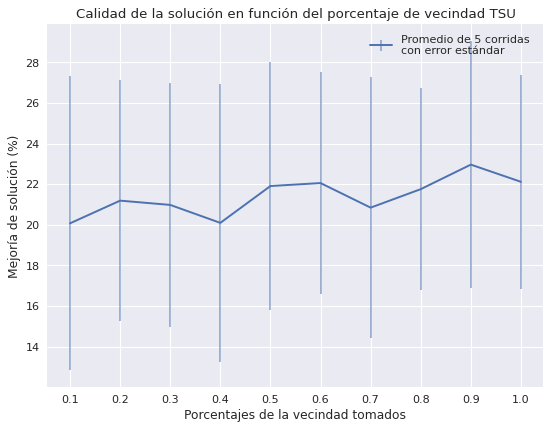

In [29]:
fig,(ax1)=plt.subplots(1,1,figsize=(8, 6), dpi=80)
tam_g = porcentajesVecindad
pro_g = prom
err_g = err
plt.xticks(tam_g)
plt.ylabel("Mejoría de solución (%)")
plt.xlabel("Porcentajes de la vecindad tomados")
plt.title("Calidad de la solución en función del porcentaje de vecindad "+tipoTabu);
_,caps,bars = ax1.errorbar(tam_g,pro_g,yerr=err_g)
[bar.set_alpha(0.5) for bar in bars]

# use them in the legend
ax1.legend(["Promedio de {} corridas \ncon error estándar".format(cantCorridas)])

fig.savefig("./graficos/porcentajesVecindadListaTabu"+str(tipoTabu)+".png")

# Exp tamaño lista tabú
### TSA


In [52]:
tipoTabu = "TSA" #TSU
tamanioGrafos = 100
cantIter = 120
tamanios = list(range(10,100+1,10)) + list(range(200,1001,100)) #TSA
#tamanios = list(range(10,cantIter+1,10)) #TSU
calidadPorTamanio = []
cantidadGrafos = 50
cantCorridas = 5 #cantidad de corridas para una misma instancia para una misma proporción de vecindad 
porcentajeVecinos = 0.8


for tam in tamanios:
    print(tam)
    calidades = []
    for i in tsu_iteraciones:
        solucionInicial = float(llamarbinTS(tipoTabu,i,tam,cantIter,porcentajeVecinos)[0])
        sumaCalidad = 0
        for j in range(cantCorridas):
            solucionFinal = float(llamarbinTS(tipoTabu,i,tam,cantIter,porcentajeVecinos)[2])
            sumaCalidad += (solucionInicial - solucionFinal)*100/solucionInicial
        calidad = sumaCalidad/cantCorridas
        calidades.append(calidad)
    calidadPorTamanio.append(calidades)

prom_tam = np.mean(calidadPorTamanio, axis=1)
err_tam = np.std(calidadPorTamanio, axis=1)

print(prom_tam)
print(err_tam)
print(tamanios)

10
^C


IndexError: list index out of range

In [ ]:
#print(calidadPorTamanio)
err_tam_2 = [err_tam[i]/np.sqrt(np.shape(calidadPorTamanio[i]))[0] for i in range(len(err_tam))]

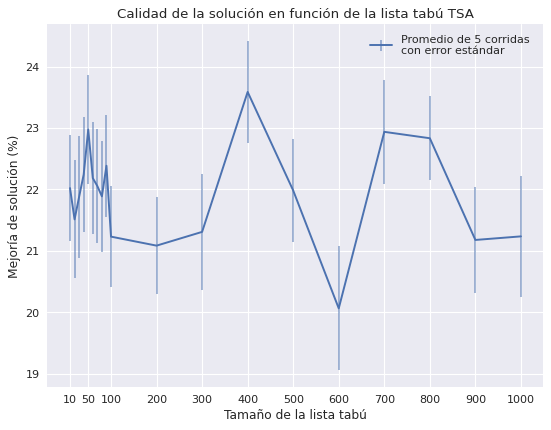

In [33]:
fig,(ax1)=plt.subplots(1,1,figsize=(8, 6), dpi=80)
tam_g = tamanios
pro_g = prom_tam
err_g = err_tam_2
plt.xticks([10,50,100]+tam_g[10:])
plt.ylabel("Mejoría de solución (%)")
plt.xlabel("Tamaño de la lista tabú")
plt.title("Calidad de la solución en función de la lista tabú "+tipoTabu);
_,caps,bars = ax1.errorbar(tam_g,pro_g,yerr=err_g)
[bar.set_alpha(0.5) for bar in bars]

# use them in the legend
ax1.legend(["Promedio de {} corridas \ncon error estándar".format(cantCorridas)])

fig.savefig("./graficos/tamaniosListaTabu"+str(tipoTabu)+"grande.png")

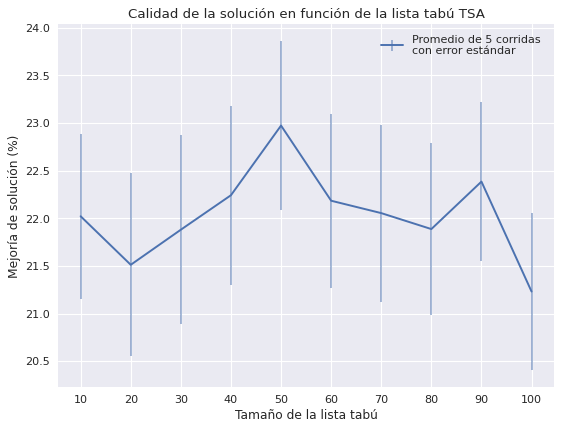

In [34]:
fig,(ax1)=plt.subplots(1,1,figsize=(8, 6), dpi=80)
tam_g = tamanios[:10]
pro_g= prom_tam[:10]
err_g = err_tam_2[:10]
plt.xticks(tam_g)
plt.ylabel("Mejoría de solución (%)")
plt.xlabel("Tamaño de la lista tabú")
plt.title("Calidad de la solución en función de la lista tabú "+tipoTabu);

_,caps,bars = ax1.errorbar(tam_g,pro_g,yerr=err_g)
[bar.set_alpha(0.5) for bar in bars]

# use them in the legend
ax1.legend(["Promedio de {} corridas \ncon error estándar".format(cantCorridas)])

fig.savefig("./graficos/tamaniosListaTabu"+str(tipoTabu)+"chico.png")

### TSU

In [53]:
tipoTabu = "TSU" #TSU
tamanioGrafos = 100
cantIter = 120
tamanios = list(range(10,100+1,10)) + list(range(200,1001,100)) #TSA
#tamanios = list(range(10,cantIter+1,10)) #TSU
calidadPorTamanio = []
cantidadGrafos = 50
cantCorridas = 5 #cantidad de corridas para una misma instancia para una misma proporción de vecindad 
porcentajeVecinos = 0.8


for tam in tamanios:
    print(tam)
    calidades = []
    for i in tsu_iteraciones:
        solucionInicial = float(llamarbinTS(tipoTabu,i,tam,cantIter,porcentajeVecinos)[0])
        sumaCalidad = 0
        for j in range(cantCorridas):
            solucionFinal = float(llamarbinTS(tipoTabu,i,tam,cantIter,porcentajeVecinos)[2])
            sumaCalidad += (solucionInicial - solucionFinal)*100/solucionInicial
        calidad = sumaCalidad/cantCorridas
        calidades.append(calidad)
    calidadPorTamanio.append(calidades)

prom_tam = np.mean(calidadPorTamanio, axis=1)
err_tam = np.std(calidadPorTamanio, axis=1)

print(prom_tam)
print(err_tam)
print(tamanios)

10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900
1000
[20.35267126 21.27461041 22.55452974 20.90254666 23.00533429 21.56149706
 20.56355983 21.74672704 19.93364156 22.67555479 22.65843267 22.01564828
 22.56690212 21.81974545 22.17880145 20.61375851 18.75019522 22.28281124
 21.79092188]
[6.07872757 6.11265824 6.05440987 6.10636824 5.20003786 5.50371757
 6.35789129 5.91395475 6.48953888 5.03502213 5.35897526 5.07815784
 6.35430917 5.83296556 6.43058991 5.66207349 6.62407414 6.00036056
 5.53620392]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [54]:
#print(calidadPorTamanio)
err_tam_2 = [err_tam[i]/np.sqrt(np.shape(calidadPorTamanio[i]))[0] for i in range(len(err_tam))]

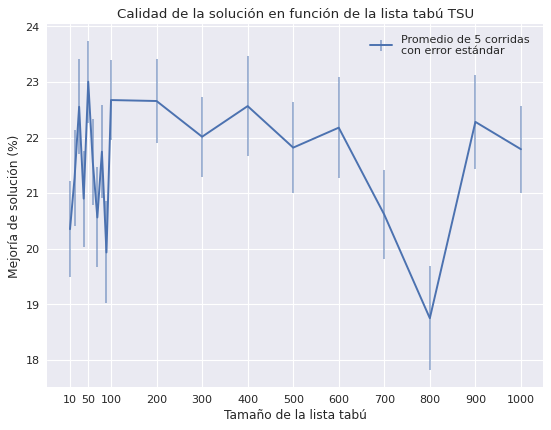

In [55]:
fig,(ax1)=plt.subplots(1,1,figsize=(8, 6), dpi=80)
tam_g = tamanios
pro_g = prom_tam
err_g = err_tam_2
plt.xticks([10,50,100]+tam_g[10:])
plt.ylabel("Mejoría de solución (%)")
plt.xlabel("Tamaño de la lista tabú")
plt.title("Calidad de la solución en función de la lista tabú "+tipoTabu);
_,caps,bars = ax1.errorbar(tam_g,pro_g,yerr=err_g)
[bar.set_alpha(0.5) for bar in bars]

# use them in the legend
ax1.legend(["Promedio de {} corridas \ncon error estándar".format(cantCorridas)])

fig.savefig("./graficos/tamaniosListaTabu"+str(tipoTabu)+"grande.png")

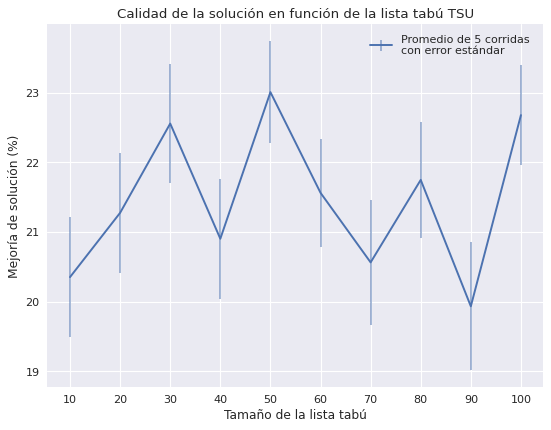

In [56]:
fig,(ax1)=plt.subplots(1,1,figsize=(8, 6), dpi=80)
tam_g = tamanios[:10]
pro_g= prom_tam[:10]
err_g = err_tam_2[:10]
plt.xticks(tam_g)
plt.ylabel("Mejoría de solución (%)")
plt.xlabel("Tamaño de la lista tabú")
plt.title("Calidad de la solución en función de la lista tabú "+tipoTabu);

_,caps,bars = ax1.errorbar(tam_g,pro_g,yerr=err_g)
[bar.set_alpha(0.5) for bar in bars]

# use them in the legend
ax1.legend(["Promedio de {} corridas \ncon error estándar".format(cantCorridas)])

fig.savefig("./graficos/tamaniosListaTabu"+str(tipoTabu)+"chico.png")

# Exp cantidad de iteraciones

In [57]:
def llamarbinTS(mode, instance_name, tam, iter, percent_vecinos):
    file=to_path(instance_name)
    #Llamo el binario desde la consola y guardo la salida en una variable
    output = !../src/ejec {mode} {file} {tam} {iter} {percent_vecinos}
    #Voy a devolver una lista donde [0]=costo sol orig [1]=cant_vectores [2]=costo_solución y [3]=array_camino
    l = ast.literal_eval(output[2])
    l = np.array(l, dtype=np.intc)
    man_out = [output[0].split(':', 1)[1]]
    man_out += output[1].split(' ', 2)
    man_out.append(l)
    return man_out

#FUNCIONA DISTINTO A funcionbinvarios, corre el binario para varias instancias y devuelve un array 
#del porcentaje de mejora de los resultados
def correrbinvariosTS(mode, lista, size, args):
    resultados = []
    bounds = np.empty(size)
    costos_modo = np.empty(size)
    for i in range(size):
        res = llamarbinTS(mode,lista[i],args[0],args[1],args[2])
        costos_modo[i]= res[2]
        bounds[i]= res[0]
    diff_costos= (bounds-costos_modo)*100/(bounds)
    resultados.append(diff_costos)
    #print(resultados)
    return resultados

In [58]:
#Generamos las instancias para este test
!cd ../data/dataGenerada && rm ./*
!../src/ejec Random 50 100 1 30
tsu_iteraciones = !ls ../data/dataGenerada
tsu_iteraciones = ["dataGenerada/" + s[:-4] for s in tsu_iteraciones]
print("Generadas las instancias para TSU_iteraciones")

mkdir: cannot create directory ‘../data/dataGenerada’: File exists
Generadas las instancias para TSU_iteraciones


Corrida: 0
iteración 10
iteración 20
iteración 30
iteración 40
iteración 50
iteración 60
iteración 70
iteración 80
iteración 90
iteración 100
iteración 110
iteración 120
iteración 130
iteración 140
iteración 150
iteración 160
iteración 170
iteración 180
iteración 190
iteración 200
[21.999844424508147, 22.049840205091133, 21.396465947628133, 24.09743708293486, 22.95085755834347, 22.936366603433267, 22.406446819731617, 22.480659093235726, 22.249391604864023, 23.05146827418676, 23.18886323566802, 21.815217964994094, 22.702280772247406, 23.144059117947922, 22.888040847189732, 23.30774239591592, 22.206376082522837, 20.90141720218251, 21.886249018944454, 22.97809197869426]
Corrida: 1
iteración 10
iteración 20
iteración 30
iteración 40
iteración 50
iteración 60
iteración 70
iteración 80
iteración 90
iteración 100
iteración 110
iteración 120
iteración 130
iteración 140
iteración 150
iteración 160
iteración 170
iteración 180
iteración 190
iteración 200
[21.36276960588416, 22.421589985690993, 21

<ErrorbarContainer object of 3 artists>

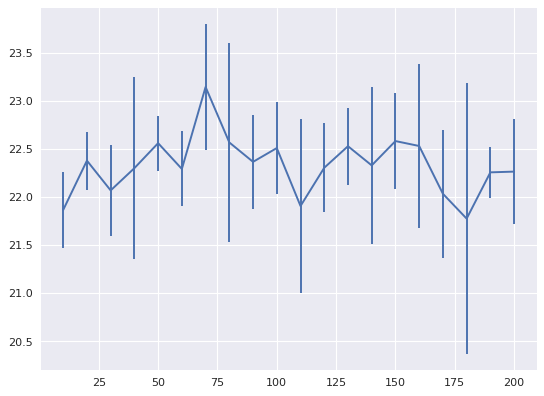

In [71]:
### ARREGLAR/REPENSAR

#modo = "TSU"
tipoTabu="TSA"
#costs_tsu = []
fig=plt.figure(figsize=(8, 6), dpi=80)
#fig, ax = plt.subplots()

'''
pseudocódigo:

totales_a_promediar = []
for j in range(corridas):
    resultados_corrida = []   #resultados_corrida[i] = resultados de todas las instancias para iteraciones[i]
    for num_iteracion en iteraciones:
        args_correrbin = [num_iteracion,los_otros_params]
        res = correrTodas(instancias, args_correrbin)   #res = [calidadinst1,calidadinst2,...,calidadinstn]
        resultados_corrida.push_back(np.mean(res))
    totales_a_promediar.append(resultados_corrida)

salidas_promediadas = [] 
for i in range(iteraciones):x
    a_promediar = [totales_a_promediar[corrida][i] for corrida in range(corridas)]
    salidas_promediadas = np.mean(a_promediar, axis=0)

prom = np.mean(salidas_promediadas,axis=1)
err = np.std(salidas_promediadas,axis=1)

plt.plot(iteraciones,prom)
plt.errorbars(iteraciones,prom,yerr=err)
'''
corridas = 5
instancias = tsu_iteraciones
size = 50
#size=2
iteraciones = list(range(10,201,10))

totales_a_promediar = []
for j in range(corridas):
    print("Corrida:",j)
    resultados_corrida = []   #resultados_corrida[i] = promedio de resultados de todas las instancias para iteraciones[i]
    for num_iteracion in iteraciones:
        print("iteración",num_iteracion)
        args_correrbin = [50,num_iteracion,0.8]
        res = correrbinvariosTS("TSA",instancias, size,args_correrbin)   #res = [calidadinst1,calidadinst2,...,calidadinstn]
        resultados_corrida.append(np.mean(res))
    print(resultados_corrida)
    totales_a_promediar.append(resultados_corrida)

#print(totales_a_promediar)
prom = np.mean(totales_a_promediar, axis=0)
err = np.std(totales_a_promediar, axis=0)

#print(salidas_promediadas)
#prom = np.mean(salidas_promediadas,axis=1)
#err = np.std(salidas_promediadas,axis=1)

#plt.plot(iteraciones,prom)
plt.errorbar(iteraciones,prom,yerr=err)


#print(costs_tsu)
#for arr in costs_tsu:
#    ax.plot(iteraciones,arr)
#ponerle legend y xticks y todo eso
#locs,_ = plt.xticks()
#ax.errorbar(locs+0.15,gran_promedio,yerr=gran_error, lw=3,ls='-',c='red')
#plt.xticks([locs,(locs+0.15)],["AMC","error\nbar"])
#plt.xticks(locs,["TSU"])
#plt.ylabel("Porcentaje de mejora(%)")
#plt.xticks(iteraciones)
#plt.title("Calidad de las soluciones de TSU");
#fig.savefig("./graficos/calidad_TSU.png")

In [64]:
print(prom)
print(err)
#print(totales_a_promediar)
print(iteraciones)

[17.24064762 18.65133596 20.39523892 18.10979382 21.45443815 18.6503118
 19.69207975 19.23106291 15.69069253 20.03014933 20.83362122 17.6505452
 17.54404554 18.73712276 20.47519899 22.10443332 20.26144369 16.11342152
 17.47240915 20.03464739]
[2.25981456 3.2873072  1.9853129  5.43681809 2.53921492 1.64376252
 2.24491801 1.87413499 4.10834101 3.48022106 3.62499444 2.28902046
 4.22973486 3.53141576 2.23220309 4.36588173 2.43067355 4.19901916
 2.61445613 3.33341107]
[[15.3233561726169, 18.745126434220786, 18.947398318563963, 21.896349795041967, 23.921892189218923, 15.788770053475936, 18.333333333333332, 16.408418131359852, 20.544763513513516, 17.316849816849818, 19.749838082901555, 15.60763888888889, 11.510398203946592, 17.61594549366483, 20.26483105163308, 25.79070675517376, 18.74569627628582, 9.910076373491009, 19.06759906759907, 20.220476781038997], [21.213653603034132, 13.460847701149426, 18.7652385928248, 19.274128459475644, 22.056448410071752, 20.600138452526757, 17.48752755540086, 

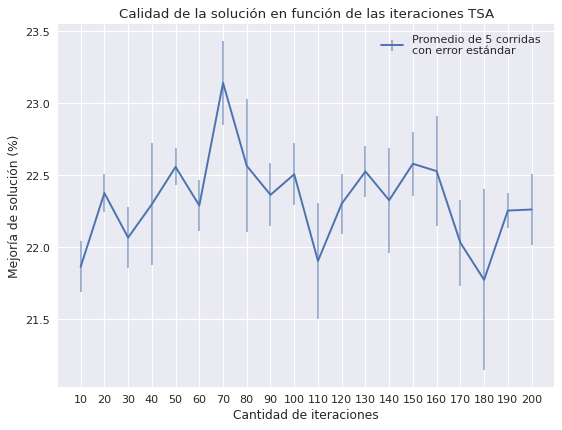

In [72]:
#print(calidadPorTamanio)
tipoTabu="TSA"
err_iter_2 = [err[i]/np.sqrt(np.array([corridas]))[0] for i in range(len(err))]
fig,(ax1)=plt.subplots(1,1,figsize=(8, 6), dpi=80)
tam_g = iteraciones
pro_g = prom
err_g = err_iter_2
plt.xticks(tam_g)
plt.ylabel("Mejoría de solución (%)")
plt.xlabel("Cantidad de iteraciones")
plt.title("Calidad de la solución en función de las iteraciones "+tipoTabu);
_,caps,bars = ax1.errorbar(tam_g,pro_g,yerr=err_g)
[bar.set_alpha(0.5) for bar in bars]

# use them in the legend
ax1.legend(["Promedio de {} corridas \ncon error estándar".format(corridas)])

fig.savefig("./graficos/iteracionesListaTabu"+str(tipoTabu)+"grande.png")

In [73]:
print(iteraciones)
print(prom)
print(err)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[21.86515785 22.37723878 22.06789913 22.29925708 22.55879829 22.29094343
 23.14232019 22.56613108 22.36463811 22.50782475 21.9060522  22.30311824
 22.52713482 22.32771246 22.58051971 22.52931514 22.03296865 21.77483321
 22.25551605 22.26324031]
[0.39610144 0.30056877 0.46872878 0.94606396 0.28701435 0.38976915
 0.65125354 1.02996258 0.48757125 0.48023188 0.90195461 0.46289773
 0.40195143 0.8118965  0.49435923 0.85457863 0.66616378 1.40372785
 0.26738523 0.54727809]


### TSU

[20.89214414668966, 22.569065067339803, 22.522698628656293, 22.6281859432489, 22.289639498576403, 22.397380949150712, 22.3689706642202, 22.023721745416733, 23.00919230227825, 22.229847709797156, 22.395370228582138, 20.78579621556175, 22.91386481456925, 22.245628938389213, 21.717640651321165, 21.534941125357513, 21.370545473217962, 22.71822195850634, 23.08021653098733, 22.605406639193493]
[20.872013965241667, 23.32177413111889, 22.16480790808235, 23.524130911050744, 21.421966289164512, 20.262055958167352, 22.381913732506764, 21.66839123612193, 21.78513416934245, 23.68979495356669, 22.209903430483664, 21.88943110895243, 22.510028535738353, 22.76544951120933, 21.46853818833552, 21.937033029964354, 21.145243006053295, 23.15893908724908, 21.890988352945804, 22.07051286887562]
[20.94754445792827, 21.561440325921478, 23.207505003238765, 21.684208634175526, 22.685976228762506, 21.307522667831655, 23.427636316140287, 22.362211027273624, 23.13719560572731, 21.218764629270396, 23.157561746352563,

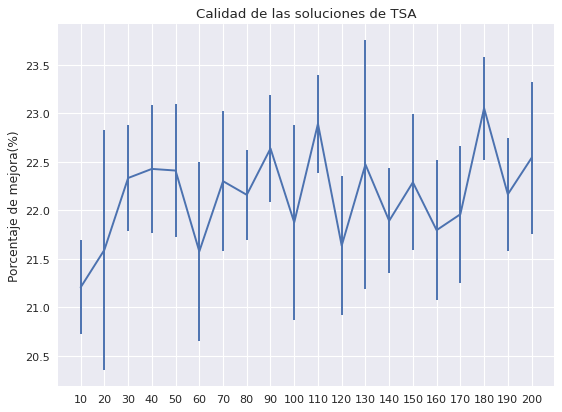

In [74]:
### ARREGLAR/REPENSAR

#modo = "TSU"
#costs_tsu = []
fig1=plt.figure(figsize=(8, 6), dpi=80)
#fig, ax = plt.subplots()

'''
pseudocódigo:

totales_a_promediar = []
for j in range(corridas):
    resultados_corrida = []   #resultados_corrida[i] = resultados de todas las instancias para iteraciones[i]
    for num_iteracion en iteraciones:
        args_correrbin = [num_iteracion,los_otros_params]
        res = correrTodas(instancias, args_correrbin)   #res = [calidadinst1,calidadinst2,...,calidadinstn]
        resultados_corrida.push_back(np.mean(res))
    totales_a_promediar.append(resultados_corrida)

salidas_promediadas = [] 
for i in range(iteraciones):
    a_promediar = [totales_a_promediar[corrida][i] for corrida in range(corridas)]
    salidas_promediadas = np.mean(a_promediar, axis=0)

prom = np.mean(salidas_promediadas,axis=1)
err = np.std(salidas_promediadas,axis=1)

plt.plot(iteraciones,prom)
plt.errorbars(iteraciones,prom,yerr=err)
'''
corridas = 5
instancias = tsu_iteraciones
size = 50
iteraciones = list(range(10,201,10))
tipoTabu = "TSU"

totales_a_promediar_tsa = []
for j in range(corridas):
    resultados_corrida = []   #resultados_corrida[i] = promedio de resultados de todas las instancias para iteraciones[i]
    for num_iteracion in iteraciones:
        args_correrbin = [50,num_iteracion,0.8]
        res = correrbinvariosTS("TSU",instancias, size,args_correrbin)   #res = [calidadinst1,calidadinst2,...,calidadinstn]
        resultados_corrida.append(np.mean(res))
    print(resultados_corrida)
    totales_a_promediar_tsa.append(resultados_corrida)

#print(totales_a_promediar)
prom_tsa = np.mean(totales_a_promediar_tsa, axis=0)
err_tsa = np.std(totales_a_promediar_tsa, axis=0)

#print(salidas_promediadas)
#prom = np.mean(salidas_promediadas,axis=1)
#err = np.std(salidas_promediadas,axis=1)

#plt.plot(iteraciones,prom_tsa)
#plt.errorbar(iteraciones,prom_tsa,yerr=err_tsa)


#print(costs_tsu)
#for arr in costs_tsu:
#    ax.plot(iteraciones,arr)
#ponerle legend y xticks y todo eso
#locs,_ = plt.xticks()
#ax.errorbar(locs+0.15,gran_promedio,yerr=gran_error, lw=3,ls='-',c='red')
#plt.xticks([locs,(locs+0.15)],["AMC","error\nbar"])
#plt.xticks(locs,["TSU"])
#plt.ylabel("Porcentaje de mejora(%)")
#plt.title("Calidad de las soluciones de TSA");
#plt.xticks(iteraciones)
#fig1.savefig("./graficos/calidad_TSA.png")

In [75]:
print(iteraciones)
print(prom_tsa)
print(err_tsa)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[21.20650168 21.59271463 22.33313405 22.42691639 22.41004241 21.57698432
 22.30039283 22.15981225 22.63739664 21.87585688 22.89233718 21.63608838
 22.47288006 21.89235614 22.28874285 21.79598547 21.95971474 23.05277982
 22.1651013  22.53978067]
[0.48357992 1.23462428 0.54304836 0.66226059 0.6831059  0.91896509
 0.71946771 0.46666525 0.55440026 1.00500409 0.50512332 0.71516643
 1.27874906 0.54235973 0.70124389 0.72022547 0.70348695 0.53018321
 0.58147449 0.7799121 ]


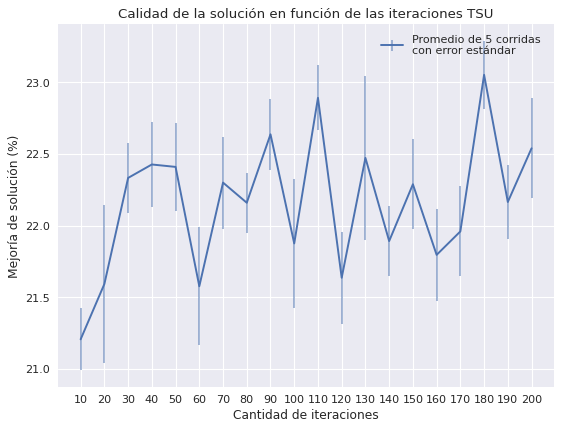

In [76]:
#print(calidadPorTamanio)
err_iter_2 = [err_tsa[i]/np.sqrt(np.array([corridas]))[0] for i in range(len(err_tsa))]
fig,(ax1)=plt.subplots(1,1,figsize=(8, 6), dpi=80)
tam_g = iteraciones
pro_g = prom_tsa
err_g = err_iter_2
plt.xticks(tam_g)
plt.ylabel("Mejoría de solución (%)")
plt.xlabel("Cantidad de iteraciones")
plt.title("Calidad de la solución en función de las iteraciones "+tipoTabu);
_,caps,bars = ax1.errorbar(tam_g,pro_g,yerr=err_g)
[bar.set_alpha(0.5) for bar in bars]

# use them in the legend
ax1.legend(["Promedio de {} corridas \ncon error estándar".format(corridas)])

fig.savefig("./graficos/iteracionesListaTabu"+str(tipoTabu)+"grande.png")

# Experimentación de parámetros óptimos con instancias de la cátedra

In [84]:
def llamarbinTS(mode, instance_name, tam, iter, percent_vecinos):
    file=to_path(instance_name)
    #Llamo el binario desde la consola y guardo la salida en una variable
    output = !../src/ejec {mode} {file} {tam} {iter} {percent_vecinos}
    #Voy a devolver una lista donde [0]=costo sol orig [1]=cant_vectores [2]=costo_solución y [3]=array_camino
    l = ast.literal_eval(output[2])
    l = np.array(l, dtype=np.intc)
    man_out = [output[0].split(':', 1)[1]]
    man_out += output[1].split(' ', 2)
    man_out.append(l)
    return man_out

#FUNCIONA DISTINTO A funcionbinvarios, corre el binario para varias instancias y devuelve un array 
#del porcentaje de mejora de los resultados
def correrbinvariosTS(mode, lista, bounds, size, args):
    resultados = []
    costos_modo = np.empty(size)
    for i in range(size):
        res = llamarbinTS(mode,lista[i],args[0],args[1],args[2])
        costos_modo[i]= res[2]
    diff_costos= (costos_modo-bounds[:size])*100/(bounds[:size])
    resultados.append(diff_costos)
    #print(resultados)
    return resultados

In [79]:
df = pd.read_csv("../mejores_sol_sin_dobles.csv")
df.sort_values(by="cities",axis=0,ascending=True,inplace=True,ignore_index=True)
#df.describe()
df.head(10)

,name,cities,type,bounds
0,burma14,14,GEO,3323
1,ulysses16,16,GEO,6859
2,gr17,17,MATRIX,2085
3,gr21,21,MATRIX,2707
4,ulysses22,22,GEO,7013
5,gr24,24,MATRIX,1272
6,fri26,26,MATRIX,937
7,bayg29,29,GEO,1610
8,bays29,29,GEO,2020
9,dantzig42,42,MATRIX,699


In [110]:
#conjuntos de instancias para exp de tiempos de ejecución donde sólo varía el tamaño de la instancia 
instancias_list = df["name"].to_numpy()
instancias_size_list = df["cities"].to_numpy()
instancias_bounds_list = df["bounds"].to_numpy()

corrida 0
corrida 1
corrida 2
corrida 3
corrida 4
[array([ 0.        ,  0.72896924,  0.47961631, 10.74990765,  3.22258662,
        8.8836478 ,  2.56136606,  2.23602484,  1.23762376,  1.43061516,
        2.90652003,  9.8097503 ,  0.5584155 ,  5.12796387,  3.99061033,
       10.01060727,  1.84682024,  3.25925926,  5.20446097,  3.17033257,
        3.99391404,  4.37654831,  0.82229114,  2.9302617 ,  4.27350427,
        1.37756027,  0.72060683,  1.43624949,  5.24642289,  6.27303707,
        0.7110128 ,  4.68164794,  0.97916314,  4.49941665,  3.2405892 ,
        9.47898152,  2.0772193 ,  1.15311683,  4.3504902 ,  3.10662042,
        3.41370073,  8.16210201,  5.28754753,  0.57457841,  1.53846154,
        9.55660783, 10.96324461,  2.46288684,  1.86257151,  7.04183267,
        2.62470093,  4.9247257 ,  7.86248429,  4.34763228,  4.16316232,
        6.4740002 ,  6.86312524, 11.65570335, 10.76067239,  8.99141069,
        3.48144755,  5.85953967,  7.29870372,  5.18014867,  3.57438261,
        9.262

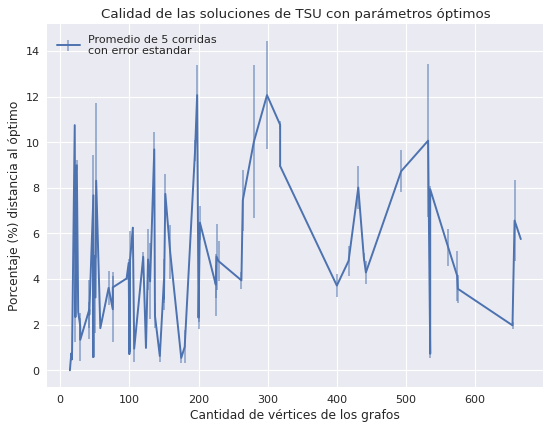

In [109]:
fig,ax1=plt.subplots(1,1,figsize=(8, 6), dpi=80)

modo = "TSU"
corridas = 5
instancias_param = instancias_list
bounds_param = instancias_bounds_list
cities_param = instancias_size_list
iteraciones = 180
tam_lista = 50
tam_vecindad = 0.9

size = 75

totales_a_promediar = []
for j in range(corridas):
    print("corrida",j)
    args_correrbin = [tam_lista,iteraciones,tam_vecindad]
    res = correrbinvariosTS(modo,instancias_param, bounds_param, size,args_correrbin)   #res = [calidadinst1,calidadinst2,...,calidadinstn]
    resultados_corrida = res[0]
    totales_a_promediar.append(resultados_corrida)
print(totales_a_promediar)
#print(totales_a_promediar)
prom_param = np.mean(totales_a_promediar, axis=0)
err_param = np.std(totales_a_promediar, axis=0)

#print(salidas_promediadas)
#prom = np.mean(salidas_promediadas,axis=1)
#err = np.std(salidas_promediadas,axis=1)

#plt.plot(iteraciones,prom)
print(cities_param[:size])
print(prom_param)
print(err_param)

#_,caps,bars = plt.errorbar(cities_param[:size],prom_param,yerr=err_param)
#[bar.set_alpha(0.5) for bar in bars]

#print(costs_tsu)
#for arr in costs_tsu:
#    ax.plot(iteraciones,arr)
#ponerle legend y xticks y todo eso
#locs,_ = plt.xticks()
#ax.errorbar(locs+0.15,gran_promedio,yerr=gran_error, lw=3,ls='-',c='red')
#plt.xticks([locs,(locs+0.15)],["AMC","error\nbar"])
#plt.xticks(locs,["TSU"])

#plt.ylabel("Porcentaje (%) distancia al óptimo")
#plt.xlabel("Cantidad de vértices de los grafos")
#plt.legend(["Promedio de {} corridas \ncon error estandar".format(corridas)],loc="upper left")
#plt.xticks([cities_param[i] for i in range(0,len(cities_param[:size]),5)] )
#plt.title("Calidad de las soluciones de "+modo+" con parámetros óptimos");
#fig.savefig("./graficos/parametros_"+modo+".png")

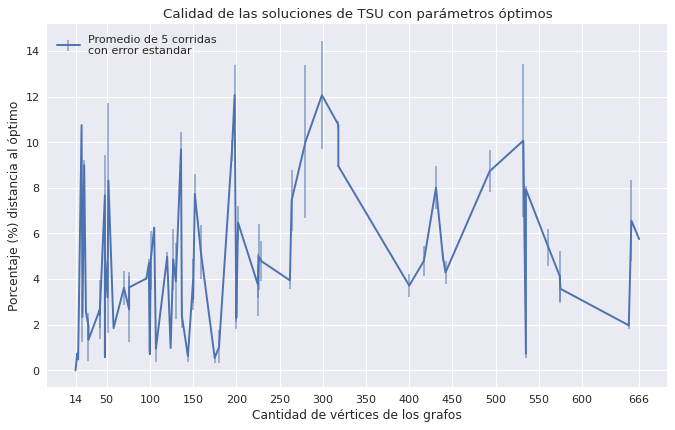

In [121]:
fig,ax1=plt.subplots(1,1,figsize=(10, 6), dpi=80)

_,caps,bars = plt.errorbar(cities_param[:size],prom_param,yerr=err_param)
[bar.set_alpha(0.5) for bar in bars]

plt.ylabel("Porcentaje (%) distancia al óptimo")
plt.xlabel("Cantidad de vértices de los grafos")
plt.legend(["Promedio de {} corridas \ncon error estandar".format(corridas)],loc="upper left")
plt.xticks([cities_param[0]]+list(range(50,601,50))+[666])
#plt.xticks([cities_param[i] for i in range(0,len(cities_param[:size]),5)] )
plt.title("Calidad de las soluciones de "+modo+" con parámetros óptimos");
fig.savefig("./graficos/parametros_"+modo+".png")

corrida 0
corrida 1
corrida 2
corrida 3
corrida 4
[array([ 0.        ,  0.72896924,  0.47961631, 10.74990765,  2.73777271,
        9.43396226,  2.56136606,  1.49068323,  2.97029703,  2.43204578,
        8.32678712,  6.9163694 ,  0.5584155 ,  5.12796387,  6.33802817,
        6.57650491,  0.        ,  5.48148148,  1.30111524,  4.87985281,
        3.99391404,  2.55986788,  0.82229114,  2.69410574,  3.90720391,
        1.37756027,  0.72060683,  0.96201617,  7.47217806,  5.50803255,
        1.29110895,  4.7968885 ,  0.97916314,  8.801001  ,  3.42062193,
       10.55780598,  1.64488283,  0.61670397,  4.3504902 ,  3.20464485,
        2.33065442,  8.16210201,  9.79562738,  0.52319335,  0.51282051,
       11.06328024,  9.60709759,  4.01875191,  1.86257151,  6.20766932,
        2.64917919,  3.16407247,  4.33251627,  4.34763228,  3.19596299,
        3.47003155, 15.08336565, 12.35500405, 10.60829605,  8.99141069,
        3.25894902,  4.32509906,  9.47413864,  2.98926476,  4.34833983,
        5.353

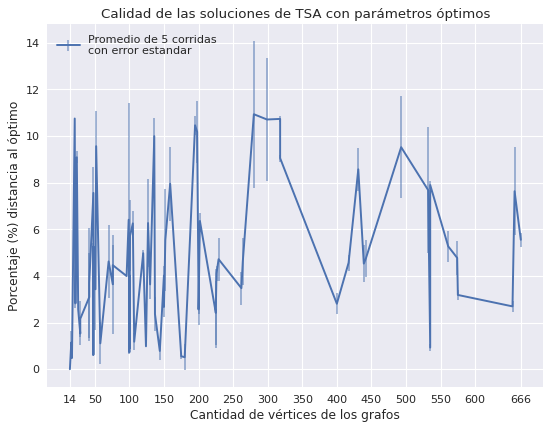

In [122]:
fig,ax1=plt.subplots(1,1,figsize=(8, 6), dpi=80)

modo = "TSA"
corridas = 5
instancias_param = instancias_list
bounds_param = instancias_bounds_list
cities_param = instancias_size_list
iteraciones = 70
tam_lista = 50
tam_vecindad = 0.8

size = 75

totales_a_promediar = []
for j in range(corridas):
    print("corrida",j)
    args_correrbin = [tam_lista,iteraciones,tam_vecindad]
    res = correrbinvariosTS(modo,instancias_param, bounds_param, size,args_correrbin)   #res = [calidadinst1,calidadinst2,...,calidadinstn]
    resultados_corrida = res[0]
    totales_a_promediar.append(resultados_corrida)
print(totales_a_promediar)
#print(totales_a_promediar)
prom_param = np.mean(totales_a_promediar, axis=0)
err_param = np.std(totales_a_promediar, axis=0)

#print(salidas_promediadas)
#prom = np.mean(salidas_promediadas,axis=1)
#err = np.std(salidas_promediadas,axis=1)

#plt.plot(iteraciones,prom)
print(cities_param[:size])
print(prom_param)
print(err_param)

#_,caps,bars = plt.errorbar(cities_param[:size],prom_param,yerr=err_param)
#[bar.set_alpha(0.5) for bar in bars]

#print(costs_tsu)
#for arr in costs_tsu:
#    ax.plot(iteraciones,arr)
#ponerle legend y xticks y todo eso
#locs,_ = plt.xticks()
#ax.errorbar(locs+0.15,gran_promedio,yerr=gran_error, lw=3,ls='-',c='red')
#plt.xticks([locs,(locs+0.15)],["AMC","error\nbar"])
#plt.xticks(locs,["TSU"])

#plt.ylabel("Porcentaje (%) distancia al óptimo")
#plt.xlabel("Cantidad de vértices de los grafos")
#plt.legend(["Promedio de {} corridas \ncon error estandar".format(corridas)],loc="upper left")
#plt.xticks([cities_param[i] for i in range(0,len(cities_param[:size]),5)] )
#plt.xticks([cities_param[0]]+list(range(50,601,50))+[666])
#plt.title("Calidad de las soluciones de "+modo+" con parámetros óptimos");
#fig.savefig("./graficos/parametros_"+modo+".png")

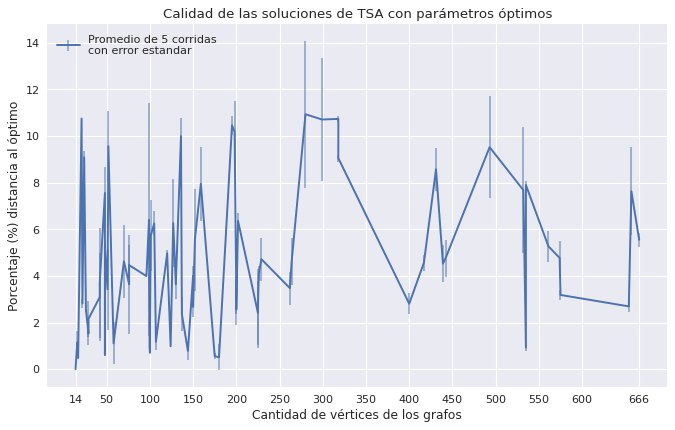

In [123]:
fig,ax1=plt.subplots(1,1,figsize=(10, 6), dpi=80)

_,caps,bars = plt.errorbar(cities_param[:size],prom_param,yerr=err_param)
[bar.set_alpha(0.5) for bar in bars]

plt.ylabel("Porcentaje (%) distancia al óptimo")
plt.xlabel("Cantidad de vértices de los grafos")
plt.legend(["Promedio de {} corridas \ncon error estandar".format(corridas)],loc="upper left")
#plt.xticks([cities_param[i] for i in range(0,len(cities_param[:size]),5)] )
plt.xticks([cities_param[0]]+list(range(50,601,50))+[666])
plt.title("Calidad de las soluciones de "+modo+" con parámetros óptimos");
fig.savefig("./graficos/parametros_"+modo+".png")

## Tiempo de ejecución vs tamaño de entrada

### TSU

In [126]:
def llamarbinTS(mode, instance_name, tam, iter, percent_vecinos):
    file=to_path(instance_name)
    #Llamo el binario desde la consola y guardo la salida en una variable
    output = !../src/ejec {mode} {file} {tam} {iter} {percent_vecinos}
    #Voy a devolver una lista donde [0]=costo sol orig [1]=cant_vectores [2]=costo_solución y [3]=array_camino
    l = ast.literal_eval(output[2])
    l = np.array(l, dtype=np.intc)
    man_out = [output[0].split(':', 1)[1]]
    man_out += output[1].split(' ', 2)
    man_out.append(l)
    return man_out

#FUNCIONA DISTINTO A funcionbinvarios, corre el binario para varias instancias y devuelve un array 
#del porcentaje de mejora de los resultados
def correrbinvariosTS(mode, lista, bounds, size, args):
    resultados = []
    costos_modo = np.empty(size)
    for i in range(size):
        res = llamarbinTS(mode,lista[i],args[0],args[1],args[2])
        costos_modo[i]= res[3]
    diff_costos= costos_modo
    resultados.append(diff_costos)
    #print(resultados)
    return resultados

corrida 0
corrida 1
corrida 2
corrida 3
corrida 4
[array([4.39080e-03, 5.63590e-03, 6.02980e-03, 9.52620e-03, 1.18230e-02,
       1.33810e-02, 1.54932e-02, 2.07357e-02, 2.23018e-02, 4.28538e-02,
       5.01526e-02, 7.57563e-02, 6.23672e-02, 6.80678e-02, 7.15070e-02,
       7.38054e-02, 8.84072e-02, 1.33079e-01, 1.54599e-01, 1.49277e-01,
       2.22351e-01, 2.42805e-01, 2.52382e-01, 2.38601e-01, 2.41705e-01,
       2.41710e-01, 2.64262e-01, 2.55992e-01, 2.93576e-01, 3.07996e-01,
       2.88535e-01, 4.01896e-01, 4.08565e-01, 4.16305e-01, 4.59496e-01,
       4.67947e-01, 4.85498e-01, 5.39602e-01, 5.22894e-01, 5.20599e-01,
       5.22895e-01, 5.32032e-01, 5.87364e-01, 8.11263e-01, 1.16732e+00,
       1.03569e+00, 9.74266e-01, 1.01592e+00, 1.06803e+00, 9.85638e-01,
       1.20974e+00, 1.21695e+00, 1.44054e+00, 1.29362e+00, 1.65204e+00,
       1.65583e+00, 1.85991e+00, 2.15673e+00, 2.75293e+00, 2.59162e+00,
       4.52695e+00, 4.78530e+00, 4.84285e+00, 4.76574e+00, 4.89275e+00,
       6.2375

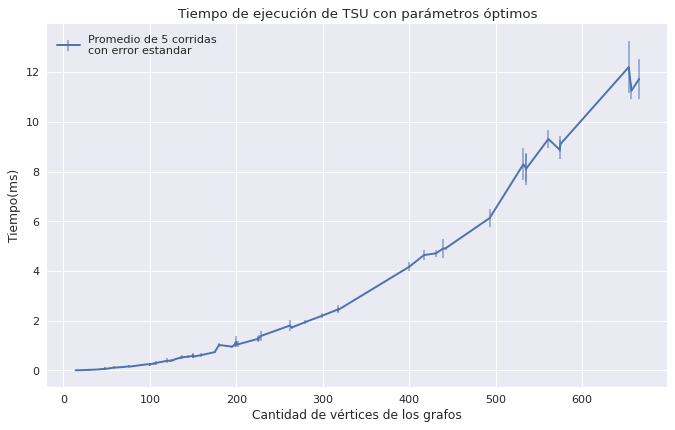

In [130]:
fig,ax1=plt.subplots(1,1,figsize=(10, 6), dpi=80)

modo = "TSU"
corridas = 5
instancias_param = instancias_list
bounds_param = instancias_bounds_list
cities_param = instancias_size_list
iteraciones = 180
tam_lista = 50
tam_vecindad = 0.9

size = 75

totales_a_promediar = []
for j in range(corridas):
    print("corrida",j)
    args_correrbin = [tam_lista,iteraciones,tam_vecindad]
    res = correrbinvariosTS(modo,instancias_param, bounds_param, size,args_correrbin)   #res = [calidadinst1,calidadinst2,...,calidadinstn]
    resultados_corrida = res[0]
    totales_a_promediar.append(resultados_corrida)
print(totales_a_promediar)
#print(totales_a_promediar)
prom_param = np.mean(totales_a_promediar, axis=0)
err_param = np.std(totales_a_promediar, axis=0)

#print(salidas_promediadas)
#prom = np.mean(salidas_promediadas,axis=1)
#err = np.std(salidas_promediadas,axis=1)

#plt.plot(iteraciones,prom)
print(cities_param[:size])
print(prom_param)
print(err_param)

_,caps,bars = plt.errorbar(cities_param[:size],prom_param,yerr=err_param)
[bar.set_alpha(0.5) for bar in bars]

#print(costs_tsu)
#for arr in costs_tsu:
#    ax.plot(iteraciones,arr)
#ponerle legend y xticks y todo eso
#locs,_ = plt.xticks()
#ax.errorbar(locs+0.15,gran_promedio,yerr=gran_error, lw=3,ls='-',c='red')
#plt.xticks([locs,(locs+0.15)],["AMC","error\nbar"])
#plt.xticks(locs,["TSU"])

plt.ylabel("Tiempo(ms)")
plt.xlabel("Cantidad de vértices de los grafos")
plt.legend(["Promedio de {} corridas \ncon error estandar".format(corridas)],loc="upper left")
#plt.xticks([cities_param[i] for i in range(0,len(cities_param[:size]),5)] )
plt.title("Tiempo de ejecución de "+modo+" con parámetros óptimos");
fig.savefig("./graficos/tiempo_"+modo+".png")

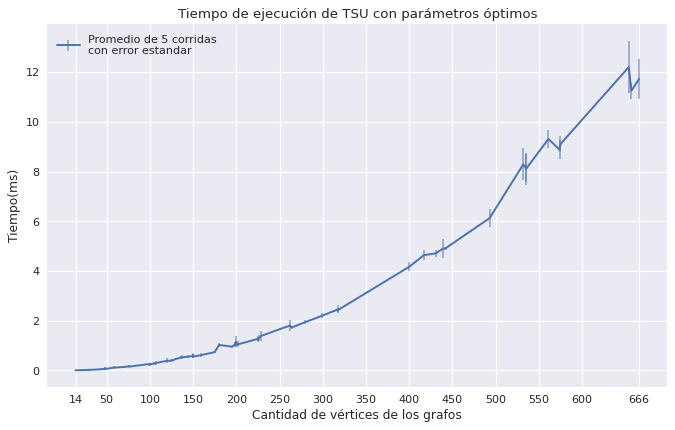

In [133]:
fig,ax1=plt.subplots(1,1,figsize=(10, 6), dpi=80)

_,caps,bars = plt.errorbar(cities_param[:size],prom_param,yerr=err_param)
[bar.set_alpha(0.5) for bar in bars]
modo="TSU"
plt.ylabel("Tiempo(ms)")
plt.xlabel("Cantidad de vértices de los grafos")
plt.legend(["Promedio de {} corridas \ncon error estandar".format(corridas)],loc="upper left")
plt.xticks([cities_param[0]]+list(range(50,601,50))+[666])
#plt.xticks([cities_param[i] for i in range(0,len(cities_param[:size]),5)] )
plt.title("Tiempo de ejecución de "+modo+" con parámetros óptimos");
fig.savefig("./graficos/tiempo_"+modo+".png")

### TSA

corrida 0
corrida 1
corrida 2
corrida 3
corrida 4
[array([1.78350e-03, 2.10620e-03, 2.35320e-03, 3.56010e-03, 5.09290e-03,
       4.97950e-03, 5.55070e-03, 7.03340e-03, 6.78390e-03, 1.42733e-02,
       1.66715e-02, 2.27081e-02, 1.98436e-02, 2.30684e-02, 2.35849e-02,
       2.44184e-02, 2.95923e-02, 4.36092e-02, 4.75930e-02, 4.88672e-02,
       8.44983e-02, 8.83387e-02, 9.08788e-02, 9.64898e-02, 9.84061e-02,
       9.59333e-02, 9.07682e-02, 9.08702e-02, 9.16107e-02, 1.03551e-01,
       1.11870e-01, 1.35133e-01, 1.40321e-01, 1.40508e-01, 1.78722e-01,
       1.73359e-01, 1.73587e-01, 1.96534e-01, 2.13561e-01, 2.04922e-01,
       2.07050e-01, 2.12249e-01, 2.17957e-01, 2.76827e-01, 5.37457e-01,
       4.35277e-01, 3.87947e-01, 3.74451e-01, 4.33479e-01, 3.81749e-01,
       5.01752e-01, 4.51143e-01, 5.69693e-01, 5.01504e-01, 7.76881e-01,
       7.51638e-01, 8.86011e-01, 9.65486e-01, 9.01376e-01, 9.11210e-01,
       1.63835e+00, 1.81671e+00, 2.06779e+00, 2.19306e+00, 2.36390e+00,
       2.2958

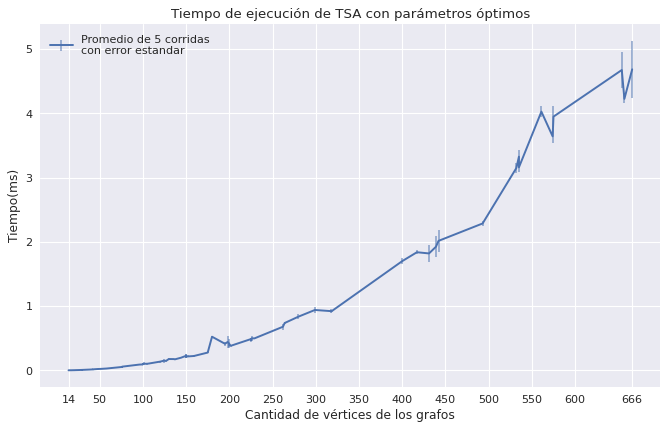

In [134]:
fig,ax1=plt.subplots(1,1,figsize=(10, 6), dpi=80)

modo = "TSA"
corridas = 5
instancias_param = instancias_list
bounds_param = instancias_bounds_list
cities_param = instancias_size_list
iteraciones = 70
tam_lista = 50
tam_vecindad = 0.8

size = 75

totales_a_promediar = []
for j in range(corridas):
    print("corrida",j)
    args_correrbin = [tam_lista,iteraciones,tam_vecindad]
    res = correrbinvariosTS(modo,instancias_param, bounds_param, size,args_correrbin)   #res = [calidadinst1,calidadinst2,...,calidadinstn]
    resultados_corrida = res[0]
    totales_a_promediar.append(resultados_corrida)
print(totales_a_promediar)
#print(totales_a_promediar)
prom_param = np.mean(totales_a_promediar, axis=0)
err_param = np.std(totales_a_promediar, axis=0)

#print(salidas_promediadas)
#prom = np.mean(salidas_promediadas,axis=1)
#err = np.std(salidas_promediadas,axis=1)

#plt.plot(iteraciones,prom)
print(cities_param[:size])
print(prom_param)
print(err_param)

_,caps,bars = plt.errorbar(cities_param[:size],prom_param,yerr=err_param)
[bar.set_alpha(0.5) for bar in bars]

#print(costs_tsu)
#for arr in costs_tsu:
#    ax.plot(iteraciones,arr)
#ponerle legend y xticks y todo eso
#locs,_ = plt.xticks()
#ax.errorbar(locs+0.15,gran_promedio,yerr=gran_error, lw=3,ls='-',c='red')
#plt.xticks([locs,(locs+0.15)],["AMC","error\nbar"])
#plt.xticks(locs,["TSU"])

plt.ylabel("Tiempo(ms)")
plt.xlabel("Cantidad de vértices de los grafos")
plt.legend(["Promedio de {} corridas \ncon error estandar".format(corridas)],loc="upper left")
#plt.xticks([cities_param[i] for i in range(0,len(cities_param[:size]),5)] )
plt.xticks([cities_param[0]]+list(range(50,601,50))+[666])
plt.title("Tiempo de ejecución de "+modo+" con parámetros óptimos");
fig.savefig("./graficos/tiempo_"+modo+".png")